In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

Bu veri setinde, 1912'de Titanic gemisinin batması sırasında yaşamını yitiren ve kurtulan yolcuların bilgileri yer alır. Devasa veri seti mürettebattan bilgi içermez, ancak yolcuların yarısının gerçek yaşlarını içerir.

In [2]:
dataOriginal=pd.read_csv("titanic.csv")
data=dataOriginal.copy()

In [3]:
data.shape #12 sütun 891 satır olduğunu görüyoruz.

(891, 12)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId= Yolcu ID'si
Survived= 0->öldü. 1->hayatta kaldı.
Pclass=  Yolcunun bulunduğu gemi sınıfı numarası(1,2,3)
Name= Yolcunun Adı
Sex= cinsiyet
Age= yaş
SibSp=Yolcunun gemideki kardeş/eş sayısı
Parch = Yolcunun gemideki ebeveyn/çocuk sayısı
Ticket= bilet no
Fare= bilet ücret
Cabin = Kabin no
Embarked= Yolcuların gemiye bindiği limanı (C = Cherbourg, Q = Queenstown, S = Southampton) 

In [6]:
data.head() #İlk 5 dataya ulaştık

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail() #son 5 dataya ulaştık.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Verisetimizde bir kaç gözlem yapalım

<AxesSubplot: xlabel='Age', ylabel='Count'>

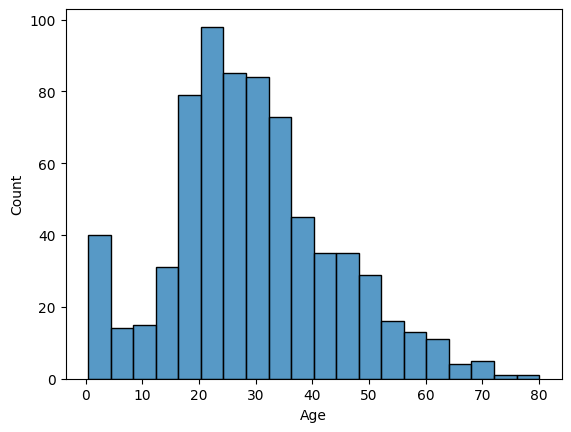

In [8]:
sns.histplot(data=data, x="Age") #Bu grafiğe göre yolcuların çoğunun 20 ile 40 yaş arasında olduğunu görebiliyoruz.

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

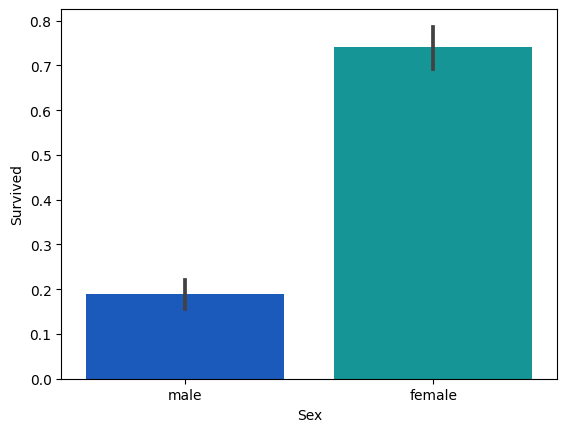

In [9]:
sns.barplot(data=data, x="Sex", y="Survived",palette="winter") #Kadınların hayatta kalma oranının erkeklere göre daha yüksek olduğunu görüyoruz.

Veri setindeki eşsiz değerlere sahip değişkenler var mı kontrol edelim.

In [10]:
data.describe(include=["object"]) #Burada passengerID ve Name değişkenlerinin eşsiz,unique olduğunu görüyoruz.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Kategorik ve sürekli değişkenler için görselleştirmeler gerçekleştirelim

In [11]:
def pie_chart(dataframe,columns):
    dataframe[columns].value_counts().plot.pie()

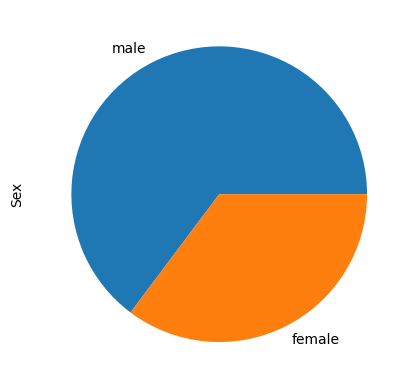

In [12]:
pie_chart(data,"Sex") #Titanik Gemisinde kadınlardan daha fazla erkek bulunuyor.

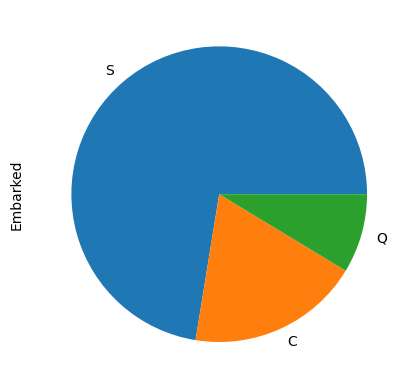

In [13]:
pie_chart(data,"Embarked") #Yolcular daha çok S limanından binmiştir. Sıralama yapacaksak S>C>Q şeklinde limandan binme sayılarını yorumlayabiliriz.

<AxesSubplot: xlabel='Survived', ylabel='count'>

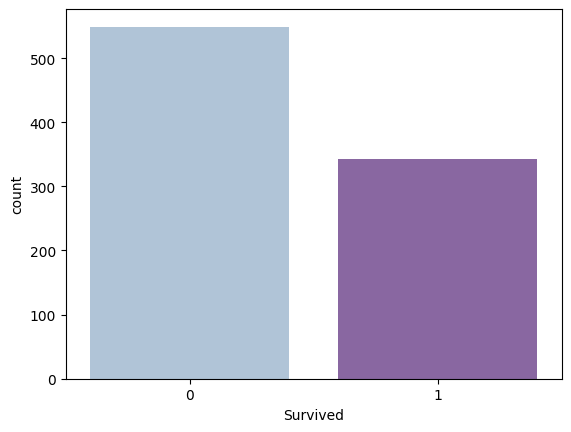

In [14]:
sns.countplot(x='Survived',data=data,palette="BuPu") #500 den fazla kişi hayatını kaybetti. 300-350 arası kişi hayatta kaldı.

<AxesSubplot: xlabel='Survived', ylabel='count'>

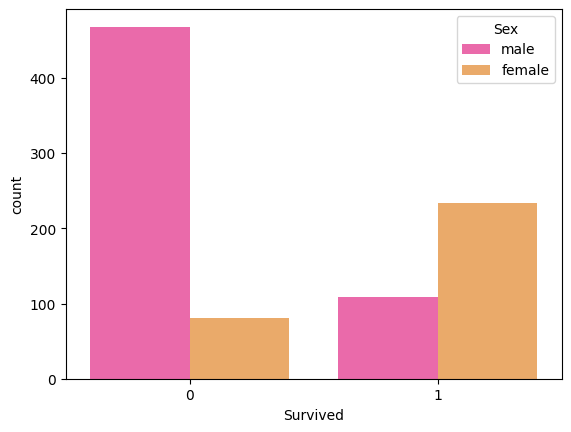

In [15]:
sns.countplot(x='Survived',hue='Sex',data=data,palette='spring') #Ölen erkek sayısı 400'ün üzerinde, ölen kadın sayısı 100 ün altındadır.
#Hayatta kalan erkek sayısı yaklaşık 100-120 aralığında iken hayatta kalan kadın sayısı 200'den fazladır.

<AxesSubplot: xlabel='Survived', ylabel='count'>

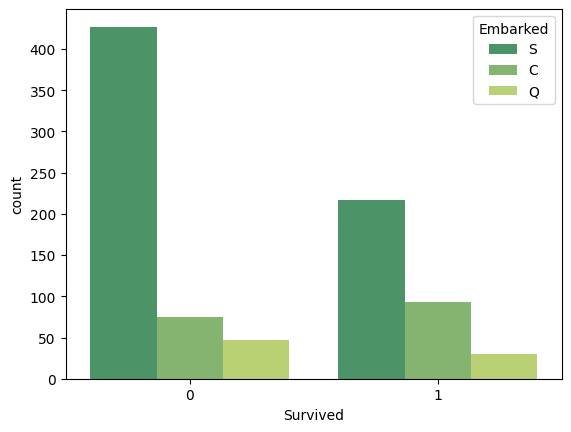

In [16]:
sns.countplot(x='Survived',hue='Embarked',data=data,palette='summer') #Cherbourg'dan binen yolculardan yaşayan sayısının vefat eden sayısından daha fazla olduğu yorumunu yapabiliriz.

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

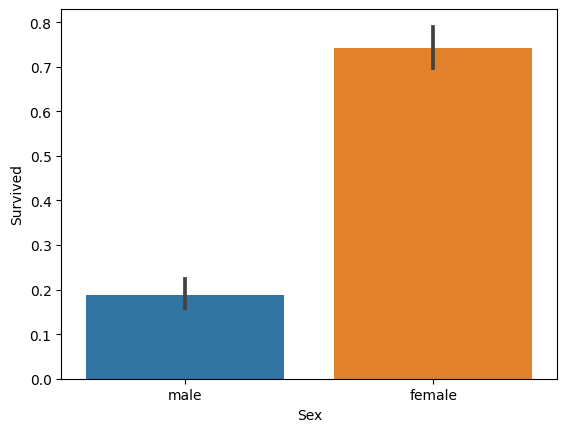

In [17]:
sns.barplot(x="Sex",y="Survived",data=data)

<AxesSubplot: xlabel='Survived', ylabel='Age'>

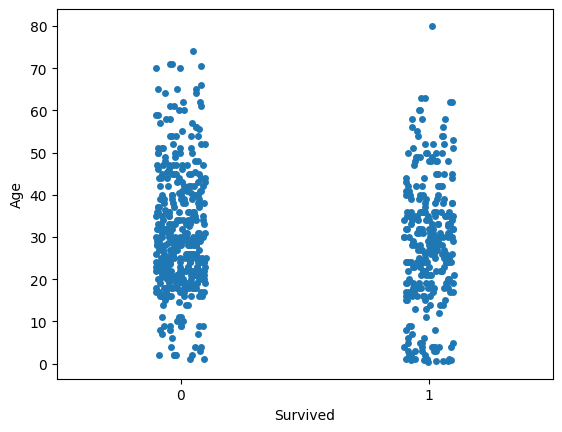

In [18]:
sns.stripplot(x='Survived', y='Age', data=data) #Vefat eden kişilerin genellikle 15-50 yaş aralığında daha yoğun olduğunu görüyoruz.

<AxesSubplot: xlabel='Survived', ylabel='count'>

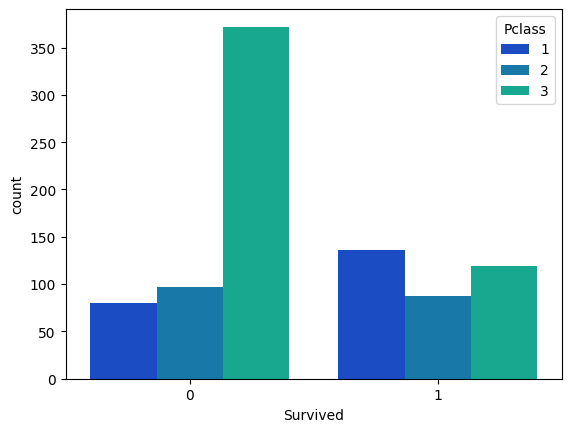

In [19]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='winter') #Buradan 1 ve 2 numaralı classlardan kurtarılma oranının daha yüksek olduğunuz görüyoruz. Tabii ki 1 ve 2.classların bilet fiyatları da 3'e göre daha pahalıdır.
#3.classta kurtarılamama oranının çok yüksek olduğunu görüyoruz. 350'den fazla kişi vefat etmişken sadece 100'ü geçen sayıda insan kurtarılmış.

<AxesSubplot: xlabel='Sex', ylabel='Fare'>

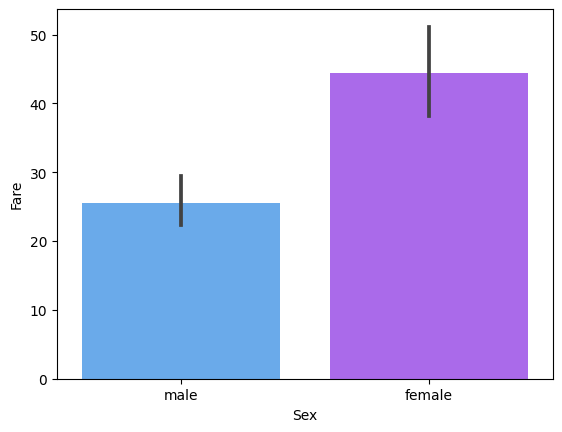

In [20]:
sns.barplot(x="Sex",y="Fare",data=data,palette="cool") #Bu tabloya göre, kadınların ortalama bilet fiyatı erkeklerden daha yüksek olduğu görülüyor. Bu farkın sebebi, kadınların 1. sınıf seyahat etme olasılıklarının daha yüksek olması olabilir.Bununla birlikte, bilet fiyatı ve cinsiyet arasında doğrudan bir neden-sonuç ilişkisi olmadığını belirtmek gerekir.

<AxesSubplot: xlabel='Pclass', ylabel='count'>

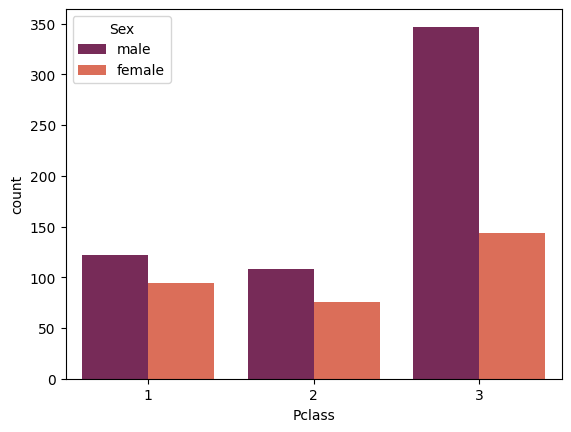

In [21]:
sns.countplot(x='Pclass',hue='Sex',data=data,palette='rocket') #1. ve 2. classlarda erkek ve kadın sayısı birbirine daha yakınken 3 numaralı classta kadınların iki katına eşit veya daha büyük sayıda erkek olduğunu söyleyebiliriz.

<AxesSubplot: xlabel='Fare', ylabel='count'>

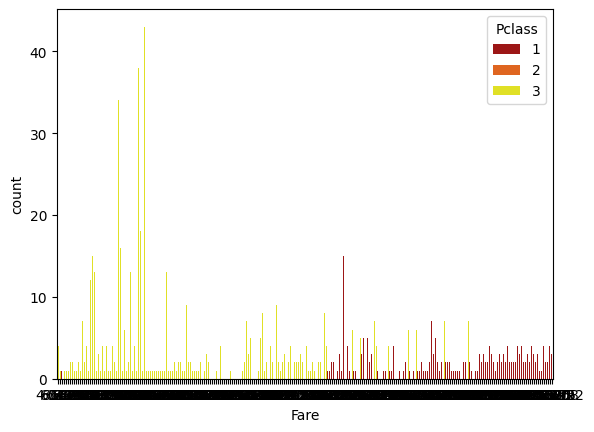

In [22]:
sns.countplot(x='Fare',hue='Pclass',data=data,palette='hot') #Bu veride fiyatlar karışık şekillendirilmiş fakat en genel haliyle First classın diğerlerine göre daha pahalı olduğu kanısına ulaşılabilir. Fakat tam olarak grafiğe göre bu söylenim doğru olmayacaktır.

<AxesSubplot: xlabel='Pclass', ylabel='count'>

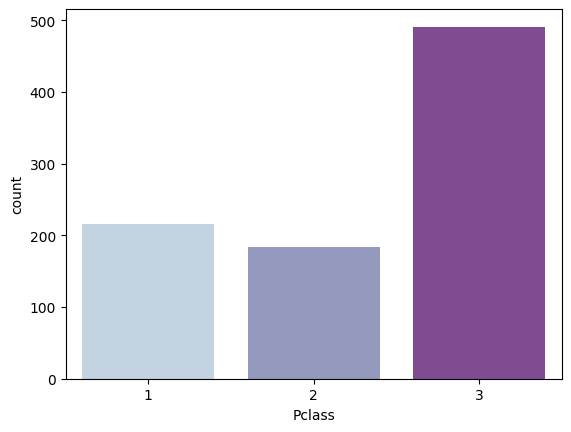

In [23]:
sns.countplot(x='Pclass',data=data,palette="BuPu")

<AxesSubplot: ylabel='Frequency'>

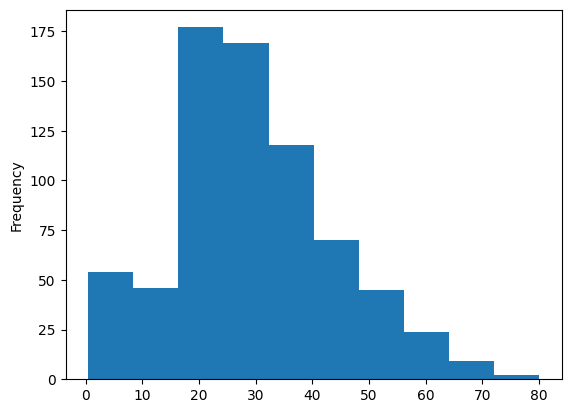

In [24]:
data['Age'].plot.hist() #Burada 20 ile 40 yaş arasındaki insanların daha yoğunlukta ve fazla olduğunu görüyoruz.

<AxesSubplot: xlabel='Sex', ylabel='Age'>

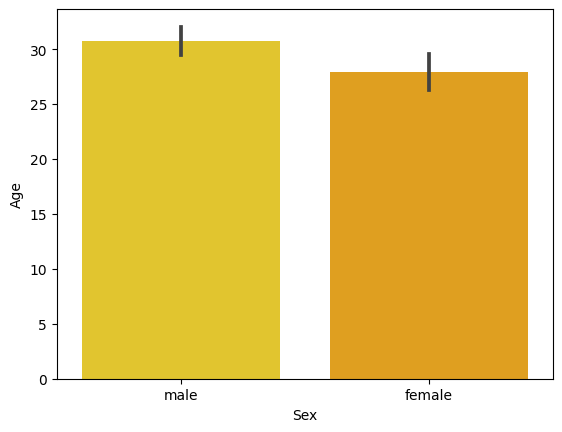

In [25]:
sns.barplot(x="Sex",y="Age",data=data,palette="Wistia") #gemideki erkek yaş ortalaması 31 civarı iken kadınların yaş ortalaması 27-28 civarıdır.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

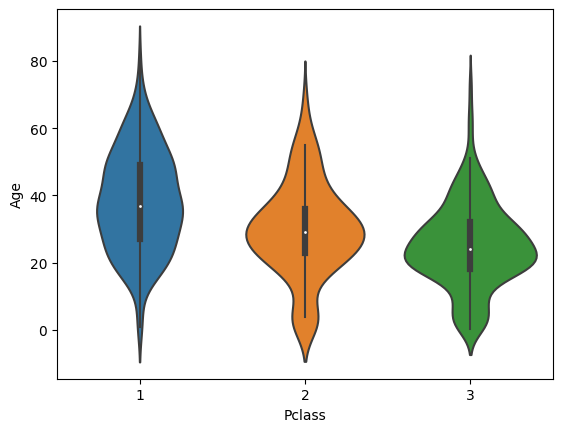

In [26]:
sns.violinplot(x='Pclass', y='Age', data=data) #25-55 yaş arasının first class, 20-40 arasının second class, yine 20-40 arasının third class da seyehat ettiğini görüyoruz.

<AxesSubplot: xlabel='Embarked', ylabel='Pclass'>

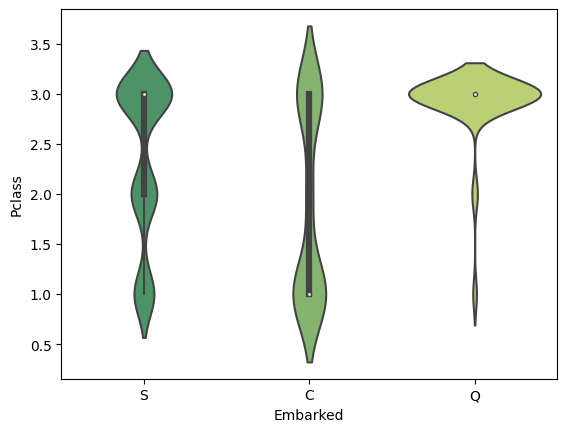

In [27]:
sns.violinplot(x='Embarked', y='Pclass', data=data, palette="summer") #Yolcuların en çok Southampton'dan bindiğini ve bunların çoğunlukla 3. sınıf seyahat ettiğini gösteriyor. Diğer yandan, Cherbourg'dan binen yolcuların çoğunun 1. sınıf seyahat ettiği görülüyor. Queenstown'dan binen yolcuların çoğunluğu ise 3. sınıf seyahat ederken, sadece birkaç yolcu 1. sınıf seyahat etmiştir.

<AxesSubplot: xlabel='Embarked', ylabel='Age'>

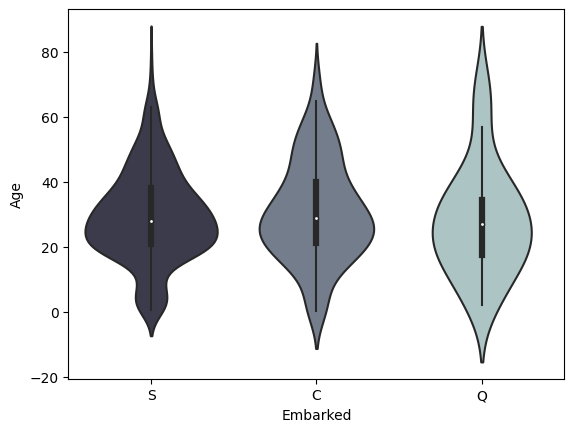

In [28]:
sns.violinplot(x='Embarked', y='Age', data=data, palette="bone") #Neredeyse 3 Limandan alınan yolcu yaş ortalamasının eşit veya eşite yakın olduğunu görüyoruz.

<AxesSubplot: ylabel='Frequency'>

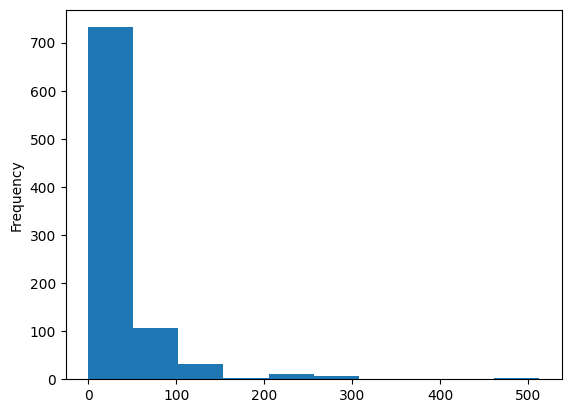

In [29]:
data['Fare'].plot.hist() #Burada çoğu yolcunun bilet ücretinin 100 $ dan daha az olduğunu görüyoruz. Çok az yolcunun ise daha yüksek ücretlerle bilet aldığını görüyoruz. 200-300 $ arası veya 500$'a yakın bir ücret.

<AxesSubplot: xlabel='SibSp', ylabel='count'>

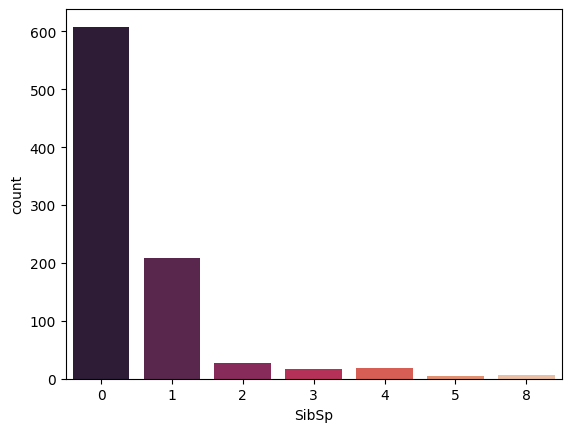

In [30]:
sns.countplot(x='SibSp',data=data,palette='rocket') #Gemide 600 ve daha fazla kişinin hiç gemide kardeşi olmadığını buradan çıkartabiliriz.

<AxesSubplot: xlabel='Sex', ylabel='SibSp'>

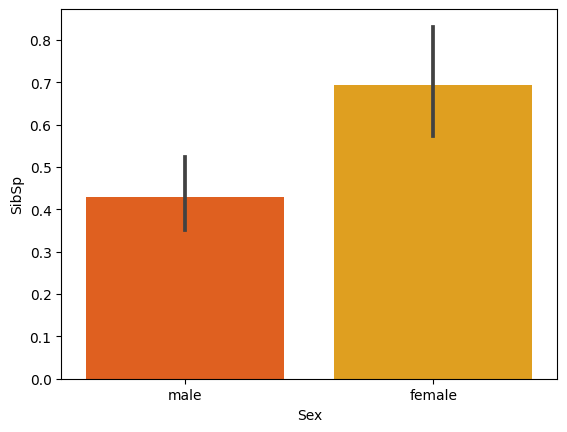

In [31]:
sns.barplot(x="Sex",y="SibSp",data=data,palette="autumn") #Kadınların erkeklere göre daha fazla Gemideki Kardeş/eş Sayısı olduğunu görebiliyoruz.

<AxesSubplot: ylabel='Frequency'>

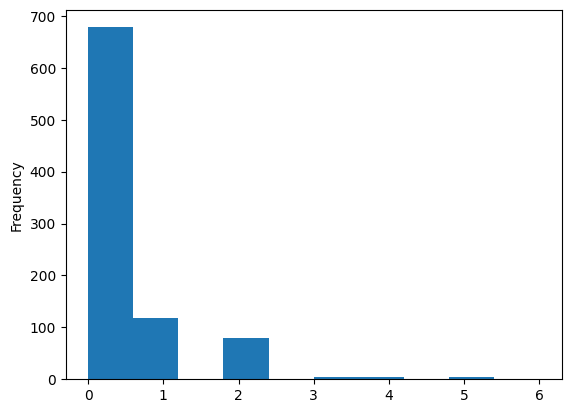

In [32]:
data['Parch'].plot.hist() #650-700 arası kişinin yani gemideki bir çok insanın gemide ebeveyni ya da çocuğu olmadığını buradan anlayabiliriz.

<AxesSubplot: xlabel='Sex', ylabel='Parch'>

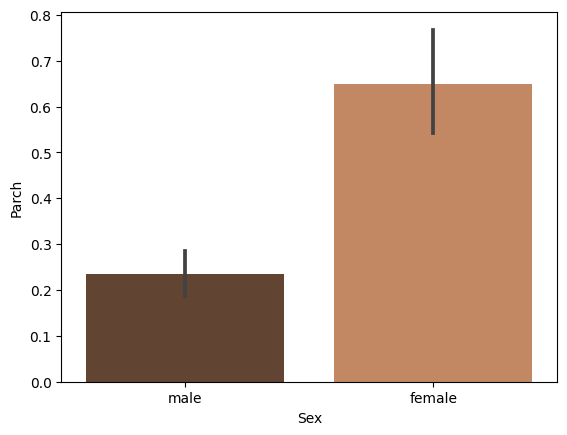

In [33]:
sns.barplot(x="Sex",y="Parch",data=data,palette="copper")#Kadınların erkeklere göre daha fazla gemide ebeveyni ya da çocuğunun olduğunu görebiliyoruz.

<AxesSubplot: xlabel='Embarked', ylabel='count'>

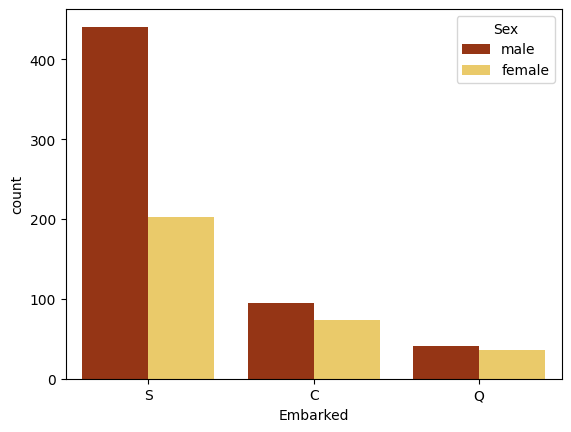

In [34]:
sns.countplot(x='Embarked',hue='Sex',data=data,palette='afmhot') #S limanından binen erkek sayısı kadın sayısının yaklaşık 2 katı veya daha azına eşitken C ve Q limanlarında bu sayılar neredeyse eşittir.

Eksik değerleri kontrol edin ve eğer var ise eksik değerleri belirlediğiniz bir methodla temizleyin.

In [35]:
data.isna().sum() #177 kişinin yaş sayısının NULL, 687 kişinin kabininin null eksik veri olduğunu biliyoruz.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

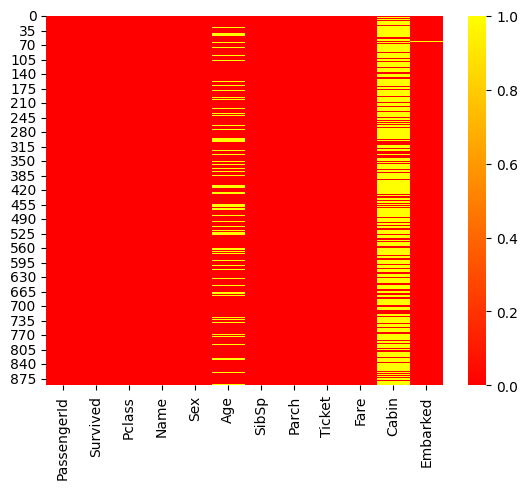

In [36]:
sns.heatmap(data.isnull(),cmap='autumn') #Cabin'i eksik olan 177 yolcunun Age, 2 yolcunun Embarked datasının eksik olduğunu bu grafiktede görsel olarak görebiliriz.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

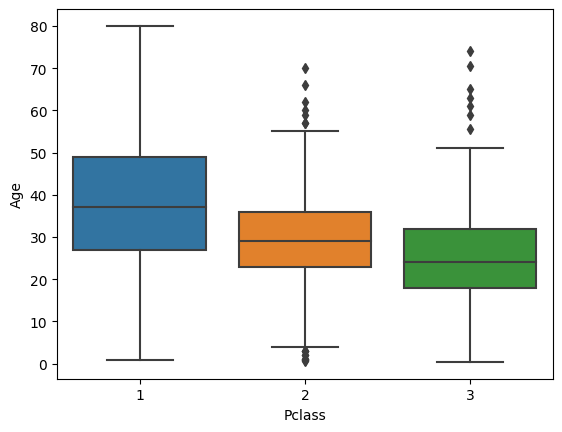

In [37]:
sns.boxplot(x='Pclass',y='Age',data=data) #1.classın yaş ortalamasının 2 ve 3 e göre daha yüksek olduğunu görüyoruz.
#2 ve 3.classta beklenmedik aykırı değerler olduğu söylenebilir.

In [38]:
data.drop('Cabin',axis=1,inplace=True) #bir veri setindeki eksik verileri temizlemek için bir değişkenin tamamen silinmesi bir yöntem olabilir. Bu yüzden cabin sutununü sileceğim.

In [39]:
data.dropna(inplace=True)

In [40]:
data.isna().sum() #Cabin sutünunu çıkardığımızda elimizde eksik olan bir veri kalmadı.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Değişkenler arasındaki korelasyonları inceleyin.

/var/folders/cl/yx8wmg8s5_7f32hvfs8gyqd00000gn/T/ipykernel_2057/2672693522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,linewidths=1)


<AxesSubplot: >

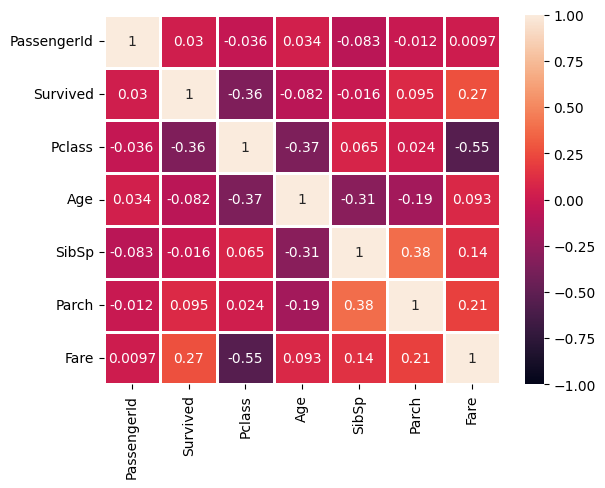

In [41]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,linewidths=1)

Korelasyon katsayısı -1 ile 1 arasında bir değer alabilir ve -1 ile -0.5 arasındaki korelasyonlar güçlü negatif, -0.5 ile -0.3 arasındaki korelasyonlar orta derecede negatif, -0.3 ile 0 arasındaki korelasyonlar zayıf negatif, 0 ile 0.3 arasındaki korelasyonlar zayıf pozitif, 0.3 ile 0.5 arasındaki korelasyonlar orta derecede pozitif ve 0.5 ile 1 arasındaki korelasyonlar güçlü pozitif olarak değerlendirilir.

->SibSp ve Parch data setine göre orta derecede pozitif diyebiliriz. Parch değişkenin artmasıyla SibSp de artacaktır. 
->Pclass ve fare ise güçlü negatif olarak adlandırılabilir. Fare azaldıkça Pclass kalitesi de düşecektir.
->Age ve survived arasında çok düşük bir korelasyon katsayısı olduğundan neredeyse hiç korelasyon olmadığı anlamına gelir. Yani Age'deki artış veya azalışın Survived üzerinde bir etkisi neredeyse yoktur.